<a href="https://colab.research.google.com/github/Luke-Williams-01/Luke-Williams-01/blob/main/ICRARproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Importing and separating the xGASS dataset

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import simps
from scipy import integrate
from scipy import stats, interpolate
from astropy.cosmology import FlatLambdaCDM
from astropy.io import fits

In [2]:
# Reading the crossmatched data into the code
# This table is crossmatched from the xGASS representative sample from Catinella et al 2018 and the xGASS decomposition master table from Cook et al 2019
hdulist = fits.open('xGASS_repDecomp_sample.fits')
hdu = hdulist[1].data
cols = hdulist[1].columns
# Importing data into arrays
HI_FLAG0 = hdu['HI_FLAG']
HIsrc0 = hdu['HIsrc']
GASS0 = hdu['GASS']
zSDSS0 = hdu['zSDSS_1']
Dlum0 = hdu['Dlum']
lgMstar0 = hdu['lgMstar']
petro90r0 = hdu['petrR90_r']
lgmust0 = hdu['lgmust']
NUVr0 = hdu['NUVr']
lgSFR_tot_median0 = hdu['lgSFR_tot_median']
SFR_best0 = hdu['SFR_best']
lgMHI0 = hdu['lgMHI']
lgGF0 = hdu['lgGF']
reD_r0 = hdu['reD_r']
MFlag0 = hdu['ModelFlag']
BtoMCorr0 = hdu['B2T_M']
BtoM0 = hdu['B2T_Mratio']
print('Starting length of the dataset is', len(HI_FLAG0))

Starting length of the dataset is 1179


In [3]:
# The first cut of the data is to remove the galaxies where there is no recorded effective radius of the disk
HI_FLAG_nan = np.delete(HI_FLAG0, (np.where(np.isnan(reD_r0))[0]))
HIsrc_nan = np.delete(HIsrc0, (np.where(np.isnan(reD_r0))[0]))
GASS_nan = np.delete(GASS0, (np.where(np.isnan(reD_r0))[0]))
zSDSS_nan = np.delete(zSDSS0, (np.where(np.isnan(reD_r0))[0]))
Dlum_nan = np.delete(Dlum0, (np.where(np.isnan(reD_r0))[0]))
lgMstar_nan = np.delete(lgMstar0, (np.where(np.isnan(reD_r0))[0]))
petro90r_nan = np.delete(petro90r0, (np.where(np.isnan(reD_r0))[0]))
lgmust_nan = np.delete(lgmust0, (np.where(np.isnan(reD_r0))[0]))
NUVr_nan = np.delete(NUVr0, (np.where(np.isnan(reD_r0))[0]))
lgSFR_tot_median_nan = np.delete(lgSFR_tot_median0, (np.where(np.isnan(reD_r0))[0]))
SFR_best_nan = np.delete(SFR_best0, (np.where(np.isnan(reD_r0))[0]))
lgMHI_nan = np.delete(lgMHI0, (np.where(np.isnan(reD_r0))[0]))
lgGF_nan = np.delete(lgGF0, (np.where(np.isnan(reD_r0))[0]))
reD_r_nan = np.delete(reD_r0, (np.where(np.isnan(reD_r0))[0]))
MFlag_nan = np.delete(MFlag0, (np.where(np.isnan(reD_r0))[0]))
BtoMCorr_nan = np.delete(BtoMCorr0, (np.where(np.isnan(reD_r0))[0]))
BtoM_nan = np.delete(BtoM0, (np.where(np.isnan(reD_r0))[0]))
print('Galaxies where there is no recorded effective radius of the disk:', len(np.where(np.isnan(reD_r0))[0]))
print('Number of galaxies present in the dataset:', len(HI_FLAG_nan))

Galaxies where there is no recorded effective radius of the disk: 161
Number of galaxies present in the dataset: 1018


In [4]:
# A HI flag determines whether a galaxy is fully resolved, marginally resolved or confused, this cut will remove all galaxies that are marginally confused and confused from the data
GASS_conf = np.delete(GASS_nan, np.where((HI_FLAG_nan > 1) & (HI_FLAG_nan < 90)))
zSDSS_conf = np.delete(zSDSS_nan, np.where((HI_FLAG_nan > 1) & (HI_FLAG_nan < 90)))
Dlum_conf = np.delete(Dlum_nan, np.where((HI_FLAG_nan > 1) & (HI_FLAG_nan < 90)))
lgMstar_conf = np.delete(lgMstar_nan, np.where((HI_FLAG_nan > 1) & (HI_FLAG_nan < 90)))
petro90r_conf = np.delete(petro90r_nan, np.where((HI_FLAG_nan > 1) & (HI_FLAG_nan < 90)))
lgmust_conf = np.delete(lgmust_nan, np.where((HI_FLAG_nan > 1) & (HI_FLAG_nan < 90)))
NUVr_conf = np.delete(NUVr_nan, np.where((HI_FLAG_nan > 1) & (HI_FLAG_nan < 90)))
lgSFR_tot_median_conf = np.delete(lgSFR_tot_median_nan, np.where((HI_FLAG_nan > 1) & (HI_FLAG_nan < 90)))
SFR_best_conf = np.delete(SFR_best_nan, np.where((HI_FLAG_nan > 1) & (HI_FLAG_nan < 90)))
lgMHI_conf = np.delete(lgMHI_nan, np.where((HI_FLAG_nan > 1) & (HI_FLAG_nan < 90)))
lgGF_conf = np.delete(lgGF_nan, np.where((HI_FLAG_nan > 1) & (HI_FLAG_nan < 90)))
HI_FLAG_conf = np.delete(HI_FLAG_nan, np.where((HI_FLAG_nan > 1) & (HI_FLAG_nan < 90)))
HIsrc_conf = np.delete(HIsrc_nan, np.where((HI_FLAG_nan > 1) & (HI_FLAG_nan < 90)))
reD_r_conf = np.delete(reD_r_nan, np.where((HI_FLAG_nan > 1) & (HI_FLAG_nan < 90)))
MFlag_conf = np.delete(MFlag_nan, np.where((HI_FLAG_nan > 1) & (HI_FLAG_nan < 90)))
BtoMCorr_conf = np.delete(BtoMCorr_nan, np.where((HI_FLAG_nan > 1) & (HI_FLAG_nan < 90)))
BtoM_conf = np.delete(BtoM_nan, np.where((HI_FLAG_nan > 1) & (HI_FLAG_nan < 90)))
print('Number of galaxies that are marginally or fully confused:', len(np.where((HI_FLAG0 > 1) & (HI_FLAG0 < 90))[0]))
print('Number of galaxies removed by this cut:', len(HI_FLAG_nan) - len(HI_FLAG_conf))
print('Number of galaxies present in the dataset:', len(HI_FLAG_conf))

Number of galaxies that are marginally or fully confused: 113
Number of galaxies removed by this cut: 86
Number of galaxies present in the dataset: 932


In [5]:
# Removing any galaxies that remain without defined NUV-r values
GASS_nuv = np.delete(GASS_conf, np.where((NUVr_conf < 0)))
zSDSS_nuv = np.delete(zSDSS_conf, np.where((NUVr_conf < 0)))
Dlum_nuv = np.delete(Dlum_conf, np.where((NUVr_conf < 0)))
lgMstar_nuv = np.delete(lgMstar_conf, np.where((NUVr_conf < 0)))
petro90r_nuv = np.delete(petro90r_conf, np.where((NUVr_conf < 0)))
lgmust_nuv = np.delete(lgmust_conf, np.where((NUVr_conf < 0)))
NUVr_nuv = np.delete(NUVr_conf, np.where((NUVr_conf < 0)))
lgSFR_tot_median_nuv = np.delete(lgSFR_tot_median_conf, np.where((NUVr_conf < 0)))
SFR_best_nuv = np.delete(SFR_best_conf, np.where((NUVr_conf < 0)))
lgMHI_nuv = np.delete(lgMHI_conf, np.where((NUVr_conf < 0)))
lgGF_nuv = np.delete(lgGF_conf, np.where((NUVr_conf < 0)))
HI_FLAG_nuv = np.delete(HI_FLAG_conf, np.where((NUVr_conf < 0)))
HIsrc_nuv = np.delete(HIsrc_conf, np.where((NUVr_conf < 0)))
reD_r_nuv = np.delete(reD_r_conf, np.where((NUVr_conf < 0)))
MFlag_nuv = np.delete(MFlag_conf, np.where((NUVr_conf < 0)))
BtoMCorr_nuv = np.delete(BtoMCorr_conf, np.where((NUVr_conf < 0)))
BtoM_nuv = np.delete(BtoM_conf, np.where((NUVr_conf < 0)))
print('Number of galaxies now present in the dataset:', len(HI_FLAG_nuv))

Number of galaxies now present in the dataset: 918


In [6]:
# Removing any galaxies that remain without defined SFR values
GASS = np.delete(GASS_nuv, np.where((SFR_best_nuv < 0)))
zSDSS = np.delete(zSDSS_nuv, np.where((SFR_best_nuv < 0)))
Dlum = np.delete(Dlum_nuv, np.where((SFR_best_nuv < 0)))
lgMstar = np.delete(lgMstar_nuv, np.where((SFR_best_nuv < 0)))
petro90r = np.delete(petro90r_nuv, np.where((SFR_best_nuv < 0)))
lgmust = np.delete(lgmust_nuv, np.where((SFR_best_nuv < 0)))
NUVr = np.delete(NUVr_nuv, np.where((SFR_best_nuv < 0)))
lgSFR_tot_median = np.delete(lgSFR_tot_median_nuv, np.where((SFR_best_nuv < 0)))
SFR_best = np.delete(SFR_best_nuv, np.where((SFR_best_nuv < 0)))
lgMHI = np.delete(lgMHI_nuv, np.where((SFR_best_nuv < 0)))
lgGF = np.delete(lgGF_nuv, np.where((SFR_best_nuv < 0)))
HI_FLAG = np.delete(HI_FLAG_nuv, np.where((SFR_best_nuv < 0)))
HIsrc = np.delete(HIsrc_nuv, np.where((SFR_best_nuv < 0)))
reD_r = np.delete(reD_r_nuv, np.where((SFR_best_nuv < 0)))
MFlag = np.delete(MFlag_nuv, np.where((SFR_best_nuv < 0)))
BtoMCorr = np.delete(BtoMCorr_nuv, np.where((SFR_best_nuv < 0)))
BtoM = np.delete(BtoM_nuv, np.where((SFR_best_nuv < 0)))
print('Number of galaxies now present in the dataset:', len(HI_FLAG))

Number of galaxies now present in the dataset: 912


In [7]:
# Finding all the rows in the xGASS data with HIsrc < 4, if HIsrc = 4, no detection of HI
# Subtracting no HI detection
# All HI-detected galaxy properties below
HIndet = np.where(HIsrc >= 4)[0]

zSDSS1 = np.delete(zSDSS, (HIndet))
Dlum1 = np.delete(Dlum, (HIndet))
lgMstar1 = np.delete(lgMstar, (HIndet))
petro90r1 = np.delete(petro90r, (HIndet))
lgmust1 = np.delete(lgmust, (HIndet))
lgSFR_tot_median1 = np.delete(lgSFR_tot_median, (HIndet))
SFR_best1 = np.delete(SFR_best, (HIndet))
lgSFR1 = np.log10(SFR_best1)
HIsrc1 = np.delete(HIsrc, (HIndet))
HI_FLAG1 = np.delete(HI_FLAG, (HIndet))
lgMHI1 = np.delete(lgMHI, (HIndet))
lgGF1 = np.delete(lgGF, (HIndet))

# Subtracting HI detection
# All no-HI-detected galaxies below
HIdet = np.where(HIsrc < 4)[0]

zSDSS2 = np.delete(zSDSS, (HIdet))
Dlum2 = np.delete(Dlum, (HIdet))
lgMstar2 = np.delete(lgMstar, (HIdet))
petro90r2 = np.delete(petro90r, (HIdet))
lgmust2 = np.delete(lgmust, (HIdet))
lgSFR_tot_median2 = np.delete(lgSFR_tot_median, (HIdet))
SFR_best2 = np.delete(SFR_best, (HIdet))
HIsrc2 = np.delete(HIsrc, (HIdet))
HI_FLAG2 = np.delete(HI_FLAG, (HIdet))
lgMHI2 = np.delete(lgMHI, (HIdet))
lgGF2 = np.delete(lgGF, (HIdet))

# The bottom two prints should sum to the top print statement
print(len(lgMstar))
print(len(lgMstar1))
print(len(lgMstar2))

# IMPORTANT
# Usually a 1, a or det at the end of a variable name mean it relates to an array where HI was detected
# Usually a 2, b or ndet at the end of a variable name mean it relates to an array where no HI was detected
# A lg in a variable name means that the array has been run through the np.log10() operation
# A p or n at the front of a variable means that it is the positive or negative bound of an error calculation

912
619
293


2) Plotting the global HI mass for each galaxy

In [8]:
# Finding the running median of the HI detections
# Arrays for the bins
bins = np.linspace(9, 11.9, 10)
bins2 = np.linspace(-1.9, 1.5, 10)

# Array of zeroes to store the median of each bin
mHIa = np.zeros(len(bins))
median1 = np.zeros(len(bins))
MAD1 = np.zeros(len(bins))

mHIb = np.zeros(len(bins2))
median2 = np.zeros(len(bins2))
MAD2 = np.zeros(len(bins2))

# Using a for loop to iterate over the median values for each of the bins
for i in range(len(bins) -1):
  # Median and MAD for HI of galaxies against stellar mass
  median1[i] = np.median(lgMHI1[np.where((lgMstar1 >= bins[i]) & (lgMstar1 <= bins[i+1]))])
  MAD1[i] = stats.median_absolute_deviation(lgMHI1[np.where((lgMstar1 >= bins[i]) & (lgMstar1 <= bins[i+1]))])
  mHIa[i] = median1[i]

for i in range (len(bins2) -1):
  # Median and MAD for HI of galaxies against SFR
  median2[i] = np.median(lgMHI1[np.where((lgSFR1 >= bins2[i]) & (lgSFR1 <= bins2[i+1]))])
  MAD2[i] = stats.median_absolute_deviation(lgMHI1[np.where((lgSFR1 >= bins2[i]) & (lgSFR1 <= bins2[i+1]))])
  mHIb[i] = median2[i]

# Working out the upper and lower bounds of the median absolute deviation
pMAD1 = mHIa + MAD1
nMAD1 = mHIa - MAD1
pMAD2 = mHIb + MAD2
nMAD2 = mHIb - MAD2

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


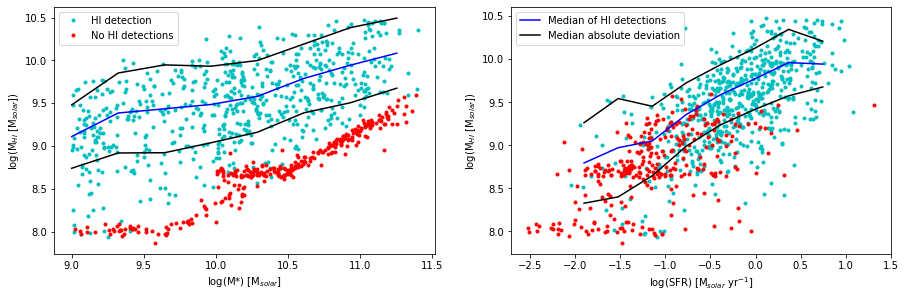

In [9]:
# Global HI mass and HI mass contained in the optical regions with median lines
plt.figure(figsize = (15,10))

plt.subplot(221)
plt.plot(lgMstar1, lgMHI1, 'c.', label= 'HI detection')
plt.plot(lgMstar2, lgMHI2, 'r.', label= 'No HI detections')
plt.plot(bins[:-2], mHIa[:-2], 'b-')
plt.plot(bins[:-2], pMAD1[:-2], 'k-')
plt.plot(bins[:-2], nMAD1[:-2], 'k-')
plt.xlabel('log(M*) [M$_{solar}$]')
plt.ylabel('log(M$_{HI}$ [M$_{solar}$])')
plt.legend(loc='upper left');

plt.subplot(222)
plt.plot(np.log10(SFR_best1), lgMHI1, 'c.')
plt.plot(np.log10(SFR_best2), lgMHI2, 'r.')
plt.plot(bins2[:-2], mHIb[:-2], 'b-', label = 'Median of HI detections')
plt.plot(bins2[:-2], pMAD2[:-2], 'k-', label = 'Median absolute deviation')
plt.plot(bins2[:-2], nMAD2[:-2], 'k-')
plt.xlabel('log(SFR) [M$_{solar}$ yr$^{-1}$]')
plt.ylabel('log(M$_{HI}$ [M$_{solar}$])')
plt.legend(loc='upper left');

3) Fitting the xGASS galaxies to the surface-density profile

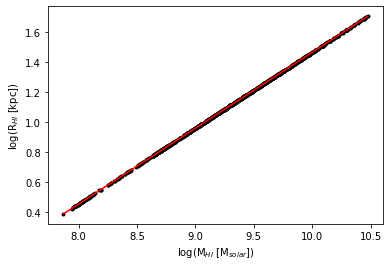

In [10]:
# DHI- MHI relation
lgDHI = 0.506*lgMHI - 3.293
MHI = 10**lgMHI
DHI = 10**lgDHI
RHI = 0.5*DHI
# For HI detections
lgDHI1 = 0.506*lgMHI1 - 3.293
MHI1 = 10**lgMHI1
DHI1 = 10**lgDHI1
RHI1 = 0.5*DHI1
# For no HI detection
lgDHI2 = 0.506*lgMHI2 - 3.293
MHI2 = 10**lgMHI2
DHI2 = 10**lgDHI2
RHI2 = 0.5*DHI2

# Plotting the R(HI)-M(HI) relation
plt.figure()
plt.plot(np.log10(MHI), np.log10(RHI), 'k.')
plt.ylabel('log(R$_{HI}$ [kpc])')
plt.xlabel('log(M$_{HI}$ [M$_{solar}$])')

# Fitting a line to the RHI-MHI relation
x = np.log10(MHI)
p = np.linspace(min(x), max(x), 100)
y = np.log10(RHI)
def linfun(x, m, c): 
    return m*x + c
p0 = np.array([])
popt, pcov = curve_fit(linfun, x, y)
plt.plot(p, linfun(p, *popt), 'r');

-0.9639211636046359
-1.2288723228732537


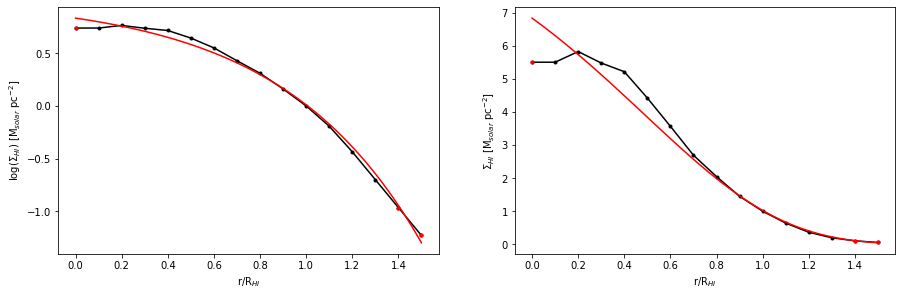

In [11]:
# Need to create a median HI profile of galaxies- (data from Wang et al 2020)
rrHI=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3])
SigHI=np.array([5.50455,5.82575,5.47971,5.21774,4.42226,3.56687,2.69376,2.04850,1.45364,1.00281,0.643707,0.368113,0.2])
lgSigHI = np.log10(SigHI)

# This data has no 0 point and some of the xGASS samples will extend further than the 1.3 r/RHI in the rrHI array, out to 1.5
# Therefore the following will linearly extrapolate:
# Back to the zero-point
x1 = np.flip(rrHI)
y1 = lgSigHI
f1 = interpolate.interp1d(x1, y1, fill_value = "extrapolate")
zpoint = f1(max(x1))
# Forward to 1.5r/RHI
x2 = rrHI
y2 = y1
f2 = interpolate.interp1d(x2, y2, fill_value = "extrapolate")
z1point = f2(1.4)
z2point = f2(1.5)

# New arrays to fit the surface density profile to
newrrHI = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5])
newSigHI=np.array([(10**zpoint),5.50455,5.82575,5.47971,5.21774,4.42226,3.56687,2.69376,2.04850,1.45364,1.00281,0.643707,0.368113,0.2,(10**z1point),(10**z2point)])
newlgSigHI = np.log10(newSigHI)

# Fitting a curve to the extrapolated data
x = newrrHI
p = np.linspace(0, max(newrrHI), 100)
y = newlgSigHI
def curvefun(x, a, b, c, d): 
    return (-a*np.exp((x*b)- c) + d)
p0 = np.array([1,1,1,1])
popt, pcov = curve_fit(curvefun, x, y, p0)

# Plotting the median HI profile using Wang 2020 data
plt.figure(figsize = (15,10))
plt.subplot(221)
plt.plot(newrrHI, newlgSigHI, 'k.-')
plt.xlabel('r/R$_{HI}$')
plt.ylabel('log(Σ$_{HI}$) [M$_{solar}$ pc$^{-2}$]')
plt.plot(p, curvefun(p, *popt), 'r-')
plt.plot(0, zpoint, 'r.')
plt.plot(1.4, z1point, 'r.')
plt.plot(1.5, z2point, 'r.');

plt.subplot(222)
plt.plot(newrrHI, newSigHI, 'k.-')
plt.xlabel('r/R$_{HI}$')
plt.ylabel('Σ$_{HI}$ [M$_{solar}$ pc$^{-2}$]')
plt.plot(p, 10**curvefun(p, *popt), 'r-')
plt.plot(0, 10**zpoint, 'r.')
plt.plot(1.4, 10**z1point, 'r.')
plt.plot(1.5, 10**z2point, 'r.');

print(z1point)
print(z2point)

4) Integrating over each profile to see the accuracy between predicted total HI mass and the HI mass from xGASS

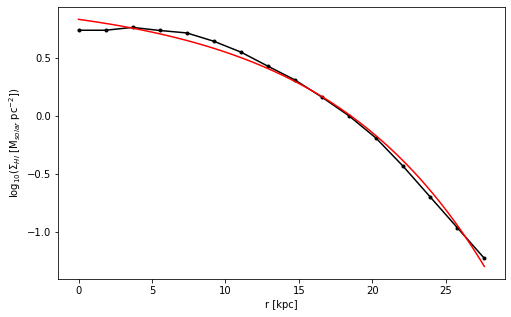

In [12]:
# Each galaxy from the xGASS representative sample can be assumed to follow the same surface density profile as modelled previously
# Rescaling the x-axis by multiplying r/RHI by the 'i'th value in the RHI array determined from the mass relation
# In this case multiplying the r/RHI in the mass relation by the value of RHI for the first galaxy

# Rescaling the curvefitting routine to use the rescaled x-axis
x = newrrHI*RHI[0]
p = np.linspace(0, max((newrrHI*RHI[0])), 100)
y = newlgSigHI
def curvefun(x, a, b, c, d): 
    return (-a*np.exp((x*b)- c) + d)
p0 = np.array([1,1,1,1])
popt, pcov = curve_fit(curvefun, x, y, p0)

# Plotting the surface-density profile for the first galaxy in xGASS
plt.figure(figsize = (8,5))
plt.plot(newrrHI*RHI[0], newlgSigHI, 'k.-')
plt.plot(p, curvefun(p, *popt), 'r-')
plt.xlabel('r [kpc]')
plt.ylabel('log$_{10}$(Σ$_{HI}$ [M$_{solar}$ pc$^{-2}$])');

In [13]:
# To compare the predicted global HI mass to the measured global HI mass we need to integrate under the surface-density profile
# This will be run for all of the galaxies and then the expected global HI mass can be plotted against the measured global HI mass
# The less scatter present in this relation the more accurate the process to determine the HI mass outside the optical region will be
ScaleR0 = newrrHI*RHI[0]
SclR0pc = ScaleR0*1000
SclR0pc2 = np.pi*((SclR0pc)**2)
Sd = 10**newlgSigHI

# Computing the integration via the trapezium method:
x_arr0 = SclR0pc2
y_arr0 = Sd
dx0 = (x_arr0[15] - x_arr0[0]) / len(x_arr0)
areas0 = np.trapz(y_arr0[0:15], x_arr0[0:15], dx = dx0)
mHIpred0 = areas0
print(np.log10(mHIpred0))
print(lgMHI[0])

9.565248700463425
9.603


In [14]:
# Loop the process of rescaling, creating the surface-density profile and computing the integration for all galaxies
# Creating arrays of zeroes to store output data
rrl = len(newrrHI)
Rl = len(RHI)
ScaleR = np.zeros(rrl)
areas = np.zeros(Rl)
MHIpred = np.zeros(Rl)

for i in range(Rl):

  # Rescaling x-axis
  # Takes r/RHI and multiplies by the HI radius for each galaxy
  ScaleR = newrrHI*RHI[i]
  # Converts from  kpc to pc
  SclRpc = ScaleR*1000
  # Approximate each galaxy HI as a flat disk, the area of a circle with radius r [pc]
  SclRpc2 = np.pi*((SclRpc)**2)

  # Rescaling the y-axis
  # Removing the log10 from the surface density
  Sd = 10**newlgSigHI
  
  # Trapezoidal integration
  x_arr = SclRpc2
  y_arr = Sd
  dx = (x_arr[15] - x_arr[0]) / len(x_arr[0:15])
  areas[i] = np.trapz(y_arr[0:15], x_arr[0:15], dx = dx)
  MHIpred[i] = areas[i]

Gradient:  0.9352506053993263 +/- 0.00019517146946756636


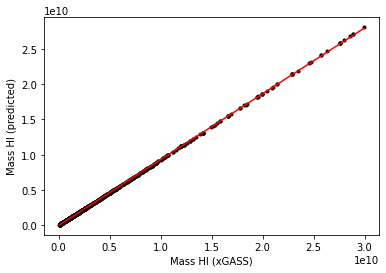

In [15]:
# Comparing how well the total predicted HI mass compares to the total HI mass from xGASS
MassHI = 10**lgMHI
MassHIpred = MHIpred
# Fitting a line to the MHI(predicted) - MHI(xGASS) relation
x = MassHI
p = np.linspace(min(x), max(x), 100)
y = MHIpred
def linfun(x, m, c): 
    return m*x + c
p0 = np.array([])
popt, pcov = curve_fit(linfun, x, y)
# Plotting
plt.plot(MassHI, MassHIpred, 'k.')
plt.xlabel('Mass HI (xGASS)')
plt.ylabel('Mass HI (predicted)')
plt.plot(p, linfun(p, *popt), 'r')
print ('Gradient: ', popt[0], '+/-', np.sqrt(pcov.diagonal()[0])) ;

5) Optical radius: 90% of the flux emitted in the r-band, integrating over this for all galaxies. We then can find the HI mass contained within the optical region of a galaxy

In [16]:
# Converting the petrosian flux in the r band from arcsec to parsec:
# Using the astropy cosmology module
# Assuming the following cosmology
cosmology = FlatLambdaCDM(H0 = 70, Om0 = 0.3, Tcmb0 = 2.273)
# Converting the data, where .arcsec_per_kpc_proper is the equation of proper distance, using the redshift of the galaxies
arckpc1 = cosmology.arcsec_per_kpc_proper(zSDSS1)
rkpc = petro90r1/arckpc1
print(rkpc[0:11])
print(max(rkpc))

[7.55712078 5.8121283  5.89997902 5.87567543 6.26790544 5.22446464
 9.07191737 4.99415006 5.77196448 8.82255907 4.18101217] kpc / arcsec
19.91285773848515 kpc / arcsec


In [17]:
# To estimate the HI mass inside the optical region of the galaxy a radius is selected that lies on the x-axis for the surface density relation plot
# This radius to 1.5x the radius of the HI region for a given galaxy is then integrated over, this gives the HI mass outside the optical region of the galaxy
# The optical region of the galaxy can be defined in various ways:

# 1) The region that encloses 90% of the optical light (petrosian flux 90% in the r-band)
# Using the optical region as the radius that encloses 90% of the flux in the optical band, we use the equations:
# Angular diameter distance of a galaxy at redshift z:
# DA(z) = DL(z)/(1+z)^2
# Definition of angular diameter distance:
# Theta = size(l)/DA(z)
# Combining these to an expression of the size of a galaxy in kpc, will allow the conversion of the petrosian 90 r band data from units of arcsec to parsec
# This then allows for the calculation of r90 in kpc and the scaling to find the surface density for each galaxy, using the profile estabilished above
# Function:
def arcpc(z, theta, Dlumin):
  arcrad = ((2*np.pi)/360) * (1/3600)
  return (Dlumin* arcrad * theta) / ((1+z)**2)

Rkpc = arcpc(zSDSS, petro90r, Dlum) * 1000
Rkpc1 = arcpc(zSDSS1, petro90r1, Dlum1) * 1000
Rkpc2 = arcpc(zSDSS2, petro90r2, Dlum2) * 1000

# Normalising the converted r band petrosian flux by dividing by RHI
rnorm = (Rkpc) / RHI
rnorm1 = (Rkpc1) / RHI1
rnorm2 = (Rkpc2) / RHI2

# To recover the x-axis with units of kpc we multiply the r/RHI by RHI
r = rnorm * RHI
r1 = rnorm1 * RHI1
r2 = rnorm2 * RHI2

newlen = len(np.where(r1 > 0 )[0]) + len(np.where(r2 > 0)[0])
print(Rkpc[0:11])
print(rnorm[0:11] )

[7.5552745 7.0760946 5.8124747 5.9020486 4.1215577 5.874771  6.2682405
 5.2238584 5.629328  8.635725  3.8034928]
[0.41035783 1.050471   0.47965288 0.4013959  1.5288588  0.6916512
 0.4223451  0.47374368 0.72496104 0.86368364 1.2674676 ]


In [18]:
# Integrating under the surface density profile with a given r(90) optical radius
# R(90) was converted from arcsec to kpc and can be converted and rescaled the same as the x-axis from previous
ScaleR0 = newrrHI*RHI[0]
SclR0pc = ScaleR0*1000
SclR0pc2 = np.pi*((SclR0pc)**2)
Sd = 10**newlgSigHI
R90pc = Rkpc[0]*1000 # <---- REMEMBER THIS WILL CHANGE WITH 'i' LIKE RHI[i]
R90pc20 = np.pi*((R90pc)**2)

# Finding the y-coordinate of R90pc2(0) via interpolation for the first galaxy
polate = interpolate.interp1d(SclR0pc2, Sd, fill_value = 'extrapolate')
newy = polate(R90pc20)
print(R90pc20)
print(SclR0pc2)
print(newy)
print(Sd)

179328933.98739645
[0.00000000e+00 1.06493949e+07 4.25975796e+07 9.58445541e+07
 1.70390318e+08 2.66234873e+08 3.83378216e+08 5.21820350e+08
 6.81561274e+08 8.62600987e+08 1.06493949e+09 1.28857678e+09
 1.53351287e+09 1.79974774e+09 2.08728140e+09 2.39611385e+09]
5.14355226975419
[5.50455    5.50455    5.82575    5.47971    5.21774    4.42226
 3.56687    2.69376    2.0485     1.45364    1.00281    0.643707
 0.368113   0.2        0.10866229 0.05903746]


In [19]:
# Computing the integration via the trapezium method:
# Placing r90 x-coordinate inside the array of the preexisting x-coordinate array
placerx = np.append(SclR0pc2, R90pc20)
x_sort = np.sort(placerx)
x_arr = x_sort[np.where(x_sort >= R90pc20)[0]]
print(x_arr)
# Placing r90 y-coordinate inside the array of the preexisting y-coordinate array
y_arr0 = Sd
placery = np.append(y_arr0, newy)
y_sort = np.sort(placery)
y_insort = y_sort[::-1]
y_arr = y_insort[np.where(x_sort >= R90pc20)[0]]
print(y_arr)

# Integrating
dx0 = (x_arr[-1] - x_arr[0]) / len(x_arr)
areasOUT = np.trapz(y_arr[0:-1], x_arr[0:-1], dx = dx0)
MHIpredout = areasOUT

print(MHIpredout)
print(10**lgMHI[0])

[1.79328934e+08 2.66234873e+08 3.83378216e+08 5.21820350e+08
 6.81561274e+08 8.62600987e+08 1.06493949e+09 1.28857678e+09
 1.53351287e+09 1.79974774e+09 2.08728140e+09 2.39611385e+09]
[5.14355227 4.42226    3.56687    2.69376    2.0485     1.45364
 1.00281    0.643707   0.368113   0.2        0.10866229 0.05903746]
2689292111.1596937
4008664288.989304


In [20]:
# Process for the first galaxy returns resonable answers for the mass of HI (predicted) outside the defined optical radius
# The mass HI (predicted, out) can be looped over all galaxies:
Rl = len(RHI)
areasOUT = np.zeros(Rl)
MHIpredoutr90 = np.zeros(Rl)

for i in range(Rl):

  # Rescaling x-axis
  # Takes r/RHI and multiplies by the HI radius for each galaxy
  ScaleR = newrrHI*RHI[i]
  # Converts from  kpc to pc
  SclRpc = ScaleR*1000
  # Approximate each galaxy HI as a flat disk, the area of a circle with radius r [pc]
  SclRpc2 = np.pi*((SclRpc)**2)

  # Rescaling the y-axis
  # Removing the log10 from the surface density
  Sd = 10**newlgSigHI

  # Radius of the optical region of a given galaxy, contains 90% flux in the r-band
  R90pc = Rkpc[i]*1000 
  R90pc2 = np.pi*((R90pc)**2)

  # Finding the y-coordinate of R90pc2 for each galaxy via interpolation
  polate = interpolate.interp1d(SclRpc2, Sd, fill_value = 'extrapolate')
  newy = polate(R90pc2)

  # Placing r90 x-coordinate inside the array of the preexisting x-coordinate array
  placerx = np.append(SclRpc2, R90pc2)
  x_sort = np.sort(placerx)
  x_arr = x_sort[np.where(x_sort >= R90pc2)[0]]

  # Placing r90 y-coordinate inside the array of the preexisting y-coordinate array
  y_arr0 = Sd
  placery = np.append(y_arr0, newy)
  y_sort = np.sort(placery)
  y_insort = y_sort[::-1]
  y_arr = y_insort[np.where(x_sort >= R90pc2)[0]]

  # Trapezoidal integration
  dx0 = (x_arr[-1] - x_arr[0]) / len(x_arr)
  areasOUT[i] = np.trapz(y_arr, x_arr, dx = dx0)
  MHIpredoutr90[i] = areasOUT[i]

In [21]:
# Using the equation MHI(predicted, inside optical) = MHI(global) - MHI(predicted, outside optical)
MHIpredinr90 = (10**lgMHI) - MHIpredoutr90

# Separating MHI(predicted, inside optical) into HI detections and non-HI detections
MHIpredin1r90 = np.delete(MHIpredinr90, (HIndet))
MHIpredin2r90 = np.delete(MHIpredinr90, (HIdet))

lgMHIpredinr90 = np.log10(MHIpredinr90)
lgMHIpredin1r90 = np.log10(MHIpredin1r90)
lgMHIpredin2r90 = np.log10(MHIpredin2r90)

6) Plotting the results of this integration and comparing with the global HI mass

In [22]:
# Finding the running median of the HI detections
# Arrays for the bins
INbins = np.linspace(9, 11.9, 10)
INbins2 = np.linspace(-1.9, 1.5, 10)

# Array of zeroes to store the median of each bin
INmHI1 = np.zeros(len(INbins))
INmedian1 = np.zeros(len(INbins))
INMAD1 = np.zeros(len(INbins))

INmHI2 = np.zeros(len(INbins2))
INmedian2 = np.zeros(len(INbins2))
INMAD2 = np.zeros(len(INbins2))

# Using a for loop to iterate over the median values for each of the bins
for i in range(len(INbins) -1):
  # Median and MAD for HI of galaxies against stellar mass
  INmedian1[i] = np.median(lgMHIpredin1r90[np.where((lgMstar1 >= INbins[i]) & (lgMstar1 <= INbins[i+1]))])
  INMAD1[i] = stats.median_absolute_deviation(lgMHIpredin1r90[np.where((lgMstar1 >= INbins[i]) & (lgMstar1 <= INbins[i+1]))])
  INmHI1[i] = INmedian1[i]

for i in range (len(INbins2) -1):
  # Median and MAD for HI of galaxies against SFR
  INmedian2[i] = np.median(lgMHIpredin1r90[np.where((lgSFR1 >= INbins2[i]) & (lgSFR1 <= INbins2[i+1]))])
  INMAD2[i] = stats.median_absolute_deviation(lgMHIpredin1r90[np.where((lgSFR1 >= INbins2[i]) & (lgSFR1 <= INbins2[i+1]))])
  INmHI2[i] = INmedian2[i]

# Working out the upper and lower bounds of the median absolute deviation
INpMAD1 = INmHI1 + INMAD1
INnMAD1 = INmHI1 - INMAD1
INpMAD2 = INmHI2 + INMAD2
INnMAD2 = INmHI2 - INMAD2

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


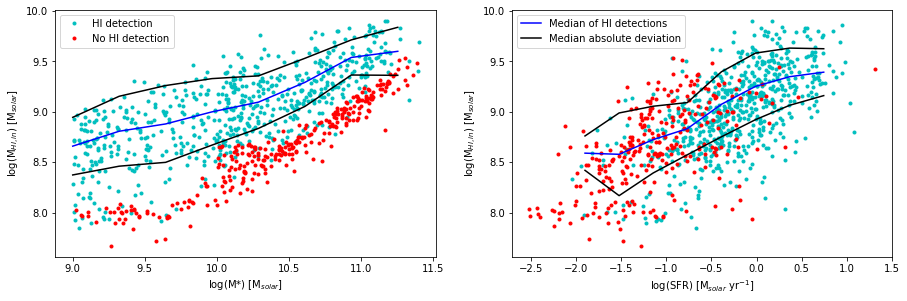

In [23]:
# Plotting the HI mass within the optical radius, against stellar masses and SFR
plt.figure(figsize = (15,10))
plt.subplot(221)
plt.plot(lgMstar1, lgMHIpredin1r90, 'c.', label= 'HI detection')
plt.plot(lgMstar2, lgMHIpredin2r90, 'r.', label= 'No HI detection')
plt.xlabel('log(M*) [M$_{solar}$]')
plt.ylabel('log(M$_{HI, in}$) [M$_{solar}$]')
plt.plot(INbins[:-2], INmHI1[:-2], 'b-')
plt.plot(INbins[:-2], INpMAD1[:-2], 'k-')
plt.plot(INbins[:-2], INnMAD1[:-2], 'k-')
plt.legend(loc='upper left');

plt.subplot(222)
plt.plot(np.log10(SFR_best1), lgMHIpredin1r90, 'c.')
plt.plot(np.log10(SFR_best2), lgMHIpredin2r90, 'r.')
plt.xlabel('log(SFR) [M$_{solar}$ yr$^{-1}$]')
plt.ylabel('log(M$_{HI, in}$) [M$_{solar}$]')
plt.plot(INbins2[:-2], INmHI2[:-2], 'b-', label = 'Median of HI detections')
plt.plot(INbins2[:-2], INpMAD2[:-2], 'k-', label = 'Median absolute deviation')
plt.plot(INbins2[:-2], INnMAD2[:-2], 'k-')
plt.legend(loc='upper left');

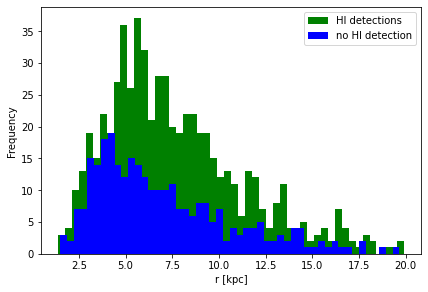

In [24]:
# Historgram plots to determine the how the investigated galaxies are distributed
plt.figure(figsize = (15,10))
plt.subplot(222)
plt.hist(r1, bins = 50, color = 'g', label = 'HI detections')
plt.hist(r2, bins = 50, color = 'b', label = 'no HI detection')
plt.xlabel('r [kpc]')
plt.ylabel('Frequency')
plt.legend(loc= 'upper right');

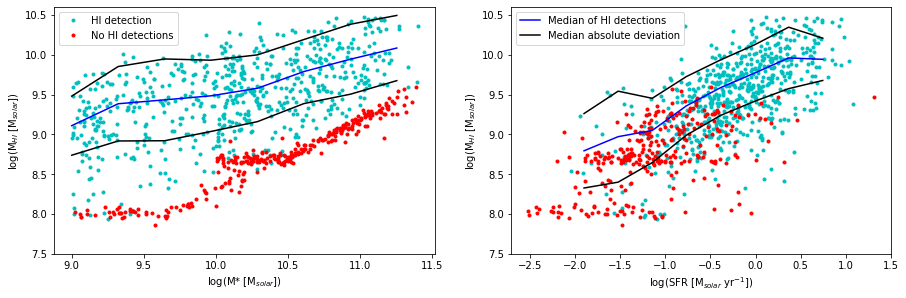

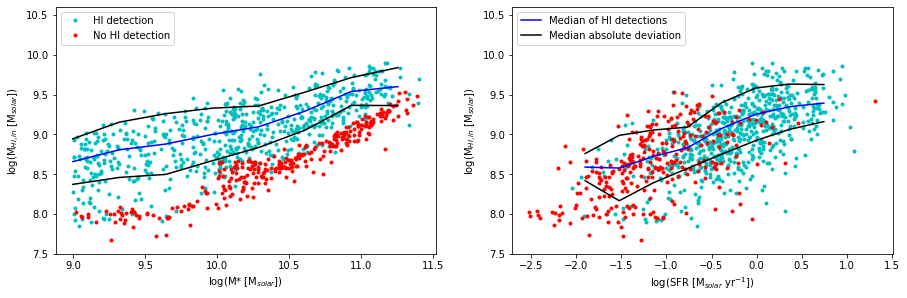

In [25]:
# Global HI mass and HI mass contained in the optical regions with median lines
plt.figure(figsize = (15,10))

plt.subplot(221)
plt.plot(lgMstar1, lgMHI1, 'c.', label= 'HI detection')
plt.plot(lgMstar2, lgMHI2, 'r.', label= 'No HI detections')
plt.plot(bins[:-2], mHIa[:-2], 'b-')
plt.plot(bins[:-2], pMAD1[:-2], 'k-')
plt.plot(bins[:-2], nMAD1[:-2], 'k-')
plt.xlabel('log(M* [M$_{solar}$])')
plt.ylabel('log(M$_{HI}$ [M$_{solar}$])')
plt.legend(loc='upper left')
plt.ylim(7.5, 10.6);

plt.subplot(222)
plt.plot(np.log10(SFR_best1), lgMHI1, 'c.')
plt.plot(np.log10(SFR_best2), lgMHI2, 'r.')
plt.plot(bins2[:-2], mHIb[:-2], 'b-', label = 'Median of HI detections')
plt.plot(bins2[:-2], pMAD2[:-2], 'k-', label = 'Median absolute deviation')
plt.plot(bins2[:-2], nMAD2[:-2], 'k-')
plt.xlabel('log(SFR [M$_{solar}$ yr$^{-1}$])')
plt.ylabel('log(M$_{HI}$ [M$_{solar}$])')
plt.legend(loc='upper left')
plt.ylim(7.5, 10.6);

# Plotting the HI mass within the optical radius, against stellar masses and SFR
plt.figure(figsize = (15,10))
plt.subplot(221)
plt.plot(lgMstar1, lgMHIpredin1r90, 'c.', label= 'HI detection')
plt.plot(lgMstar2, lgMHIpredin2r90, 'r.', label= 'No HI detection')
plt.xlabel('log(M* [M$_{solar}$])')
plt.ylabel('log(M$_{HI, in}$ [M$_{solar}$])')
plt.plot(INbins[:-2], INmHI1[:-2], 'b-')
plt.plot(INbins[:-2], INpMAD1[:-2], 'k-')
plt.plot(INbins[:-2], INnMAD1[:-2], 'k-')
plt.legend(loc='upper left')
plt.ylim(7.5, 10.6);

plt.subplot(222)
plt.plot(np.log10(SFR_best1), lgMHIpredin1r90, 'c.')
plt.plot(np.log10(SFR_best2), lgMHIpredin2r90, 'r.')
plt.xlabel('log(SFR [M$_{solar}$ yr$^{-1}$])')
plt.ylabel('log(M$_{HI, in}$ [M$_{solar}$])')
plt.plot(INbins2[:-2], INmHI2[:-2], 'b-', label = 'Median of HI detections')
plt.plot(INbins2[:-2], INpMAD2[:-2], 'k-', label = 'Median absolute deviation')
plt.plot(INbins2[:-2], INnMAD2[:-2], 'k-')
plt.legend(loc='upper left')
plt.ylim(7.5, 10.6);

7) Finding the running median for all the galaxies not just the HI detections

In [26]:
# Finding the running median of all the galaxies in the sample for HI global
# Arrays for the bins
bins = np.linspace(9, 11.9, 10)
bins2 = np.linspace(-1.9, 1.5, 10)

# Array of zeroes to store the median of each bin
mHIa = np.zeros(len(bins))
median1 = np.zeros(len(bins))
MAD1 = np.zeros(len(bins))

mHIb = np.zeros(len(bins2))
median2 = np.zeros(len(bins2))
MAD2 = np.zeros(len(bins2))

# Using a for loop to iterate over the median values for each of the bins
for i in range(len(bins) -1):
  # Median and MAD for HI of galaxies against stellar mass
  median1[i] = np.median(lgMHI[np.where((lgMstar >= bins[i]) & (lgMstar <= bins[i+1]))])
  MAD1[i] = stats.median_absolute_deviation(lgMHI[np.where((lgMstar >= bins[i]) & (lgMstar <= bins[i+1]))])
  mHIa[i] = median1[i]

for i in range (len(bins2) -1):
  # Median and MAD for HI of galaxies against SFR
  median2[i] = np.median(lgMHI[np.where((np.log10(SFR_best) >= bins2[i]) & (np.log10(SFR_best) <= bins2[i+1]))])
  MAD2[i] = stats.median_absolute_deviation(lgMHI[np.where((np.log10(SFR_best) >= bins2[i]) & (np.log10(SFR_best) <= bins2[i+1]))])
  mHIb[i] = median2[i]

# Working out the upper and lower bounds of the median absolute deviation
pMAD1 = mHIa + MAD1
nMAD1 = mHIa - MAD1
pMAD2 = mHIb + MAD2
nMAD2 = mHIb - MAD2

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [27]:
# Finding the running median of all the galaxies in the sample for the HI inner
# Arrays for the bins
INbins = np.linspace(9, 11.9, 10)
INbins2 = np.linspace(-1.9, 1.5, 10)

# Array of zeroes to store the median of each bin
INmHI1 = np.zeros(len(INbins))
INmedian1 = np.zeros(len(INbins))
INMAD1 = np.zeros(len(INbins))

INmHI2 = np.zeros(len(INbins2))
INmedian2 = np.zeros(len(INbins2))
INMAD2 = np.zeros(len(INbins2))

# Using a for loop to iterate over the median values for each of the bins
for i in range(len(INbins) -1):
  # Median and MAD for HI of galaxies against stellar mass
  INmedian1[i] = np.median(lgMHIpredinr90[np.where((lgMstar >= INbins[i]) & (lgMstar <= INbins[i+1]))])
  INMAD1[i] = stats.median_absolute_deviation(lgMHIpredinr90[np.where((lgMstar >= INbins[i]) & (lgMstar <= INbins[i+1]))])
  INmHI1[i] = INmedian1[i]

for i in range (len(INbins2) -1):
  # Median and MAD for HI of galaxies against SFR
  INmedian2[i] = np.median(lgMHIpredinr90[np.where((np.log10(SFR_best) >= INbins2[i]) & (np.log10(SFR_best) <= INbins2[i+1]))])
  INMAD2[i] = stats.median_absolute_deviation(lgMHIpredinr90[np.where((np.log10(SFR_best) >= INbins2[i]) & (np.log10(SFR_best) <= INbins2[i+1]))])
  INmHI2[i] = INmedian2[i]

# Working out the upper and lower bounds of the median absolute deviation
INpMAD1 = INmHI1 + INMAD1
INnMAD1 = INmHI1 - INMAD1
INpMAD2 = INmHI2 + INMAD2
INnMAD2 = INmHI2 - INMAD2

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


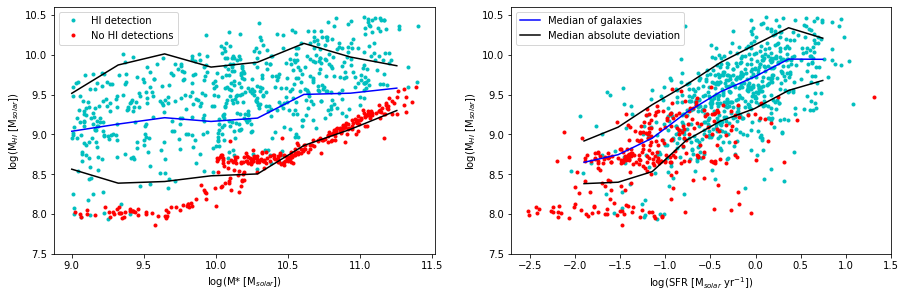

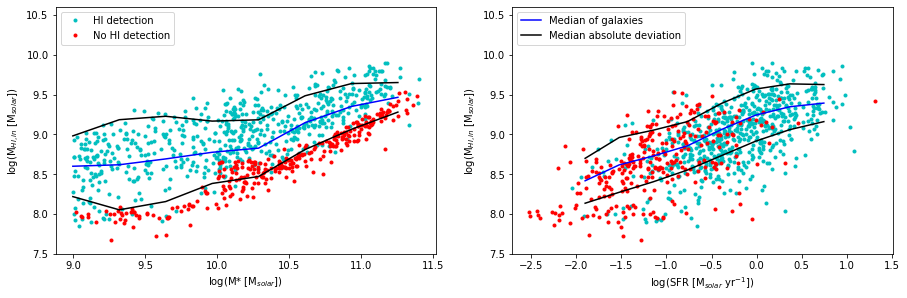

In [28]:
# Global HI mass and HI mass contained in the optical region, defined as the radius of 90% of the r-band flux with median lines
plt.figure(figsize = (15,10))

plt.subplot(221)
plt.plot(lgMstar1, lgMHI1, 'c.', label= 'HI detection')
plt.plot(lgMstar2, lgMHI2, 'r.', label= 'No HI detections')
plt.plot(bins[:-2], mHIa[:-2], 'b-')
plt.plot(bins[:-2], pMAD1[:-2], 'k-')
plt.plot(bins[:-2], nMAD1[:-2], 'k-')
plt.xlabel('log(M* [M$_{solar}$])')
plt.ylabel('log(M$_{HI}$ [M$_{solar}$])')
plt.legend(loc='upper left')
plt.ylim(7.5, 10.6);

plt.subplot(222)
plt.plot(np.log10(SFR_best1), lgMHI1, 'c.')
plt.plot(np.log10(SFR_best2), lgMHI2, 'r.')
plt.plot(bins2[:-2], mHIb[:-2], 'b-', label = 'Median of galaxies')
plt.plot(bins2[:-2], pMAD2[:-2], 'k-', label = 'Median absolute deviation')
plt.plot(bins2[:-2], nMAD2[:-2], 'k-')
plt.xlabel('log(SFR [M$_{solar}$ yr$^{-1}$])')
plt.ylabel('log(M$_{HI}$ [M$_{solar}$])')
plt.legend(loc='upper left')
plt.ylim(7.5, 10.6);

# Plotting the HI mass within the optical radius, against stellar masses and SFR
plt.figure(figsize = (15,10))
plt.subplot(221)
plt.plot(lgMstar1, lgMHIpredin1r90, 'c.', label= 'HI detection')
plt.plot(lgMstar2, lgMHIpredin2r90, 'r.', label= 'No HI detection')
plt.xlabel('log(M* [M$_{solar}$])')
plt.ylabel('log(M$_{HI, in}$ [M$_{solar}$])')
plt.plot(INbins[:-2], INmHI1[:-2], 'b-')
plt.plot(INbins[:-2], INpMAD1[:-2], 'k-')
plt.plot(INbins[:-2], INnMAD1[:-2], 'k-')
plt.legend(loc='upper left')
plt.ylim(7.5, 10.6);

plt.subplot(222)
plt.plot(np.log10(SFR_best1), lgMHIpredin1r90, 'c.')
plt.plot(np.log10(SFR_best2), lgMHIpredin2r90, 'r.')
plt.xlabel('log(SFR [M$_{solar}$ yr$^{-1}$])')
plt.ylabel('log(M$_{HI, in}$ [M$_{solar}$])')
plt.plot(INbins2[:-2], INmHI2[:-2], 'b-', label = 'Median of galaxies')
plt.plot(INbins2[:-2], INpMAD2[:-2], 'k-', label = 'Median absolute deviation')
plt.plot(INbins2[:-2], INnMAD2[:-2], 'k-')
plt.legend(loc='upper left')
plt.ylim(7.5, 10.6);

8) Optical radius: 2x the effective radius of the disk measured in the r-band. Following the same integration procedure as before

In [29]:
# Another definition of the optical region of a galaxy would be to take the effective radius and double it
# The effective radius is the radius enclosing 50% of the emitted light of a galaxy, in the r-band this would be 50% of the optical light
# Using the xGASS decomposition data from Cook et al 2019 we can use the effective radius in the r-band of the disk of a galaxy rather than the whole galaxy radius
# The radii from the decomposition catalogue are the radii of the Sersic profile in pixels
# Where the conversion for pixels to arcseconds is 0.396"/pixel:
# Since the effective radius is only half the emitted light we need to double this radius:
effrDpix = reD_r
effrDarc = effrDpix * 0.396 * 2

In [30]:
# 2) Effective radius of the disk component, doubled
# Using the equations:
# Angular diameter distance of a galaxy at redshift z:
# DA(z) = DL(z)/(1+z)^2
# Definition of angular diameter distance:
# Theta = size(l)/DA(z)
# Combining these to an expression of the size of a galaxy in kpc, will allow the conversion of the petrosian 90 r band data from units of arcsec to parsec
# This then allows for the calculation of Effective radius of disk in kpc and the scaling to find the surface density for each galaxy, using the profile estabilished above
# Function:
def arcpc(z, theta, Dlumin):
  arcrad = ((2*np.pi)/360) * (1/3600)
  return (Dlumin* arcrad * theta) / ((1+z)**2)

effRkpc = arcpc(zSDSS, effrDarc, Dlum) * 1000
#Rkpc1 = arcpc(zSDSS1, petro90r1, Dlum1) * 1000
#Rkpc2 = arcpc(zSDSS2, petro90r2, Dlum2) * 1000

print(effRkpc[0:11])
print(Rkpc[0:11])

[10.95919231  9.98150456  9.56815279  7.99022237  5.50663407  9.14754661
  6.74453861  7.25028028  6.69830867  7.44979649  4.91885191]
[7.5552745 7.0760946 5.8124747 5.9020486 4.1215577 5.874771  6.2682405
 5.2238584 5.629328  8.635725  3.8034928]


In [31]:
# The global HI mass graphs will stay the same, however the integration process will be repeated for the new optical radius, subsituting in effective disk radius
# The mass HI (predicted, out) can be looped over all galaxies:
Rl = len(RHI)
areasOUT = np.zeros(Rl)
MHIpredout2eff = np.zeros(Rl)

for i in range(Rl):

  # Rescaling x-axis
  # Takes r/RHI and multiplies by the HI radius for each galaxy
  ScaleR = newrrHI*RHI[i]
  # Converts from  kpc to pc
  SclRpc = ScaleR*1000
  # Approximate each galaxy HI as a flat disk, the area of a circle with radius r [pc]
  SclRpc2 = np.pi*((SclRpc)**2)

  # Rescaling the y-axis
  # Removing the log10 from the surface density
  Sd = 10**newlgSigHI

  # Radius of the optical region of a given galaxy, effective radius of the disk doubled
  effRpc = effRkpc[i]*1000 
  effRpc2 = np.pi*((effRpc)**2)

  # Finding the y-coordinate of R90pc2 for each galaxy via interpolation
  polate = interpolate.interp1d(SclRpc2, Sd, fill_value = 'extrapolate')
  newy = polate(effRpc2)

  # Placing r90 x-coordinate inside the array of the preexisting x-coordinate array
  placerx = np.append(SclRpc2, effRpc2)
  x_sort = np.sort(placerx)
  x_arr = x_sort[np.where(x_sort >= effRpc2)[0]]

  # Placing r90 y-coordinate inside the array of the preexisting y-coordinate array
  y_arr0 = Sd
  placery = np.append(y_arr0, newy)
  y_sort = np.sort(placery)
  y_insort = y_sort[::-1]
  y_arr = y_insort[np.where(x_sort >= effRpc2)[0]]
  # Trapezoidal integration
  dx0 = (x_arr[-1] - x_arr[0]) / len(x_arr)
  
  areasOUT[i] = np.trapz(y_arr, x_arr, dx = dx0)
  MHIpredout2eff[i] = areasOUT[i]

In [32]:
# Using the equation MHI(predicted, inside optical) = MHI(global) - MHI(predicted, outside optical)
MHIpredin2eff = (10**lgMHI) - MHIpredout2eff

# Separating MHI(predicted, inside optical) into HI detections and non-HI detections
MHIpredin12eff = np.delete(MHIpredin2eff, (HIndet))
MHIpredin22eff = np.delete(MHIpredin2eff, (HIdet))

lgMHIpredin2eff = np.log10(MHIpredin2eff)
lgMHIpredin12eff = np.log10(MHIpredin12eff)
lgMHIpredin22eff = np.log10(MHIpredin22eff)

9) Plotting the global HI mass in comparison to the HI mass inside the optical region (effective radius)

In [33]:
# Finding the running median of all the galaxies in the sample for HI global
# Arrays for the bins
bins = np.linspace(9, 11.9, 10)
bins2 = np.linspace(-1.9, 1.5, 10)

# Array of zeroes to store the median of each bin
mHIa = np.zeros(len(bins))
median1 = np.zeros(len(bins))
MAD1 = np.zeros(len(bins))

mHIb = np.zeros(len(bins2))
median2 = np.zeros(len(bins2))
MAD2 = np.zeros(len(bins2))

# Using a for loop to iterate over the median values for each of the bins
for i in range(len(bins) -1):
  # Median and MAD for HI of galaxies against stellar mass
  median1[i] = np.median(lgMHI1[np.where((lgMstar1 >= bins[i]) & (lgMstar1 <= bins[i+1]))])
  MAD1[i] = stats.median_absolute_deviation(lgMHI1[np.where((lgMstar1 >= bins[i]) & (lgMstar1 <= bins[i+1]))])
  mHIa[i] = median1[i]

for i in range (len(bins2) -1):
  # Median and MAD for HI of galaxies against SFR
  median2[i] = np.median(lgMHI1[np.where((np.log10(SFR_best1) >= bins2[i]) & (np.log10(SFR_best1) <= bins2[i+1]))])
  MAD2[i] = stats.median_absolute_deviation(lgMHI1[np.where((np.log10(SFR_best1) >= bins2[i]) & (np.log10(SFR_best1) <= bins2[i+1]))])
  mHIb[i] = median2[i]

# Working out the upper and lower bounds of the median absolute deviation
pMAD1 = mHIa + MAD1
nMAD1 = mHIa - MAD1
pMAD2 = mHIb + MAD2
nMAD2 = mHIb - MAD2

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [34]:
# Finding the running median of all the galaxies in the sample for the HI inner
# Arrays for the bins
INbins = np.linspace(9, 11.9, 10)
INbins2 = np.linspace(-1.9, 1.5, 10)

# Array of zeroes to store the median of each bin
INmHI1 = np.zeros(len(INbins))
INmedian1 = np.zeros(len(INbins))
INMAD1 = np.zeros(len(INbins))

INmHI2 = np.zeros(len(INbins2))
INmedian2 = np.zeros(len(INbins2))
INMAD2 = np.zeros(len(INbins2))

# Using a for loop to iterate over the median values for each of the bins
for i in range(len(INbins) -1):
  # Median and MAD for HI of galaxies against stellar mass
  INmedian1[i] = np.median(lgMHIpredin12eff[np.where((lgMstar1 >= INbins[i]) & (lgMstar1 <= INbins[i+1]))])
  INMAD1[i] = stats.median_absolute_deviation(lgMHIpredin12eff[np.where((lgMstar1 >= INbins[i]) & (lgMstar1 <= INbins[i+1]))])
  INmHI1[i] = INmedian1[i]

for i in range (len(INbins2) -1):
  # Median and MAD for HI of galaxies against SFR
  INmedian2[i] = np.median(lgMHIpredin12eff[np.where((np.log10(SFR_best1) >= INbins2[i]) & (np.log10(SFR_best1) <= INbins2[i+1]))])
  INMAD2[i] = stats.median_absolute_deviation(lgMHIpredin12eff[np.where((np.log10(SFR_best1) >= INbins2[i]) & (np.log10(SFR_best1) <= INbins2[i+1]))])
  INmHI2[i] = INmedian2[i]

# Working out the upper and lower bounds of the median absolute deviation
INpMAD1 = INmHI1 + INMAD1
INnMAD1 = INmHI1 - INMAD1
INpMAD2 = INmHI2 + INMAD2
INnMAD2 = INmHI2 - INMAD2

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


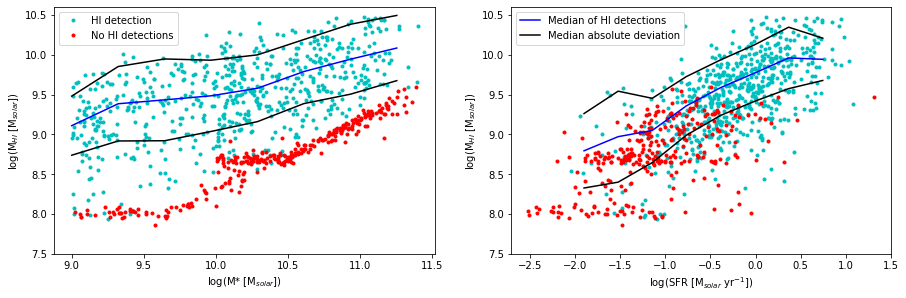

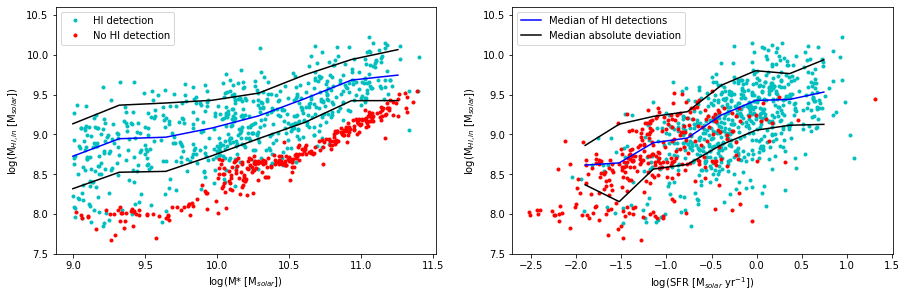

In [35]:
plt.figure(figsize = (15,10))

plt.subplot(221)
plt.plot(lgMstar1, lgMHI1, 'c.', label= 'HI detection')
plt.plot(lgMstar2, lgMHI2, 'r.', label= 'No HI detections')
plt.plot(bins[:-2], mHIa[:-2], 'b-')
plt.plot(bins[:-2], pMAD1[:-2], 'k-')
plt.plot(bins[:-2], nMAD1[:-2], 'k-')
plt.xlabel('log(M* [M$_{solar}$])')
plt.ylabel('log(M$_{HI}$ [M$_{solar}$])')
plt.legend(loc='upper left')
plt.ylim(7.5, 10.6);

plt.subplot(222)
plt.plot(np.log10(SFR_best1), lgMHI1, 'c.')
plt.plot(np.log10(SFR_best2), lgMHI2, 'r.')
plt.plot(bins2[:-2], mHIb[:-2], 'b-', label = 'Median of HI detections')
plt.plot(bins2[:-2], pMAD2[:-2], 'k-', label = 'Median absolute deviation')
plt.plot(bins2[:-2], nMAD2[:-2], 'k-')
plt.xlabel('log(SFR [M$_{solar}$ yr$^{-1}$])')
plt.ylabel('log(M$_{HI}$ [M$_{solar}$])')
plt.legend(loc='upper left')
plt.ylim(7.5, 10.6);

# Plotting the HI mass within the optical radius (effective radius of the disk), against stellar masses and SFR
plt.figure(figsize = (15,10))
plt.subplot(221)
plt.plot(lgMstar1, lgMHIpredin12eff, 'c.', label= 'HI detection')
plt.plot(lgMstar2, lgMHIpredin22eff, 'r.', label= 'No HI detection')
plt.xlabel('log(M* [M$_{solar}$])')
plt.ylabel('log(M$_{HI, in}$ [M$_{solar}$])')
plt.plot(INbins[:-2], INmHI1[:-2], 'b-')
plt.plot(INbins[:-2], INpMAD1[:-2], 'k-')
plt.plot(INbins[:-2], INnMAD1[:-2], 'k-')
plt.legend(loc='upper left')
plt.ylim(7.5, 10.6);

plt.subplot(222)
plt.plot(np.log10(SFR_best1), lgMHIpredin12eff, 'c.')
plt.plot(np.log10(SFR_best2), lgMHIpredin22eff, 'r.')
plt.xlabel('log(SFR [M$_{solar}$ yr$^{-1}$])')
plt.ylabel('log(M$_{HI, in}$ [M$_{solar}$])')
plt.plot(INbins2[:-2], INmHI2[:-2], 'b-', label = 'Median of HI detections')
plt.plot(INbins2[:-2], INpMAD2[:-2], 'k-', label = 'Median absolute deviation')
plt.plot(INbins2[:-2], INnMAD2[:-2], 'k-')
plt.legend(loc='upper left')
plt.ylim(7.5, 10.6);

10) Plotting the same graphs with running medians that account for all galaxies in the sample

In [36]:
# Finding the running median of all the galaxies in the sample for HI global
# Arrays for the bins
bins = np.linspace(9, 11.9, 10)
bins2 = np.linspace(-1.9, 1.5, 10)

# Array of zeroes to store the median of each bin
mHIa = np.zeros(len(bins))
median1 = np.zeros(len(bins))
MAD1 = np.zeros(len(bins))

mHIb = np.zeros(len(bins2))
median2 = np.zeros(len(bins2))
MAD2 = np.zeros(len(bins2))

# Using a for loop to iterate over the median values for each of the bins
for i in range(len(bins) -1):
  # Median and MAD for HI of galaxies against stellar mass
  median1[i] = np.median(lgMHI[np.where((lgMstar >= bins[i]) & (lgMstar <= bins[i+1]))])
  MAD1[i] = stats.median_absolute_deviation(lgMHI[np.where((lgMstar >= bins[i]) & (lgMstar <= bins[i+1]))])
  mHIa[i] = median1[i]

for i in range (len(bins2) -1):
  # Median and MAD for HI of galaxies against SFR
  median2[i] = np.median(lgMHI[np.where((np.log10(SFR_best) >= bins2[i]) & (np.log10(SFR_best) <= bins2[i+1]))])
  MAD2[i] = stats.median_absolute_deviation(lgMHI[np.where((np.log10(SFR_best) >= bins2[i]) & (np.log10(SFR_best) <= bins2[i+1]))])
  mHIb[i] = median2[i]

# Working out the upper and lower bounds of the median absolute deviation
pMAD1 = mHIa + MAD1
nMAD1 = mHIa - MAD1
pMAD2 = mHIb + MAD2
nMAD2 = mHIb - MAD2

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [37]:
# Finding the running median of all the galaxies in the sample for the HI inner
# Arrays for the bins
INbins = np.linspace(9, 11.9, 10)
INbins2 = np.linspace(-1.9, 1.5, 10)

# Array of zeroes to store the median of each bin
INmHI1 = np.zeros(len(INbins))
INmedian1 = np.zeros(len(INbins))
INMAD1 = np.zeros(len(INbins))

INmHI2 = np.zeros(len(INbins2))
INmedian2 = np.zeros(len(INbins2))
INMAD2 = np.zeros(len(INbins2))

# Using a for loop to iterate over the median values for each of the bins
for i in range(len(INbins) -1):
  # Median and MAD for HI of galaxies against stellar mass
  INmedian1[i] = np.median(lgMHIpredin2eff[np.where((lgMstar >= INbins[i]) & (lgMstar <= INbins[i+1]))])
  INMAD1[i] = stats.median_absolute_deviation(lgMHIpredin2eff[np.where((lgMstar >= INbins[i]) & (lgMstar <= INbins[i+1]))])
  INmHI1[i] = INmedian1[i]

for i in range (len(INbins2) -1):
  # Median and MAD for HI of galaxies against SFR
  INmedian2[i] = np.median(lgMHIpredin2eff[np.where((np.log10(SFR_best) >= INbins2[i]) & (np.log10(SFR_best) <= INbins2[i+1]))])
  INMAD2[i] = stats.median_absolute_deviation(lgMHIpredin2eff[np.where((np.log10(SFR_best) >= INbins2[i]) & (np.log10(SFR_best) <= INbins2[i+1]))])
  INmHI2[i] = INmedian2[i]

# Working out the upper and lower bounds of the median absolute deviation
INpMAD1 = INmHI1 + INMAD1
INnMAD1 = INmHI1 - INMAD1
INpMAD2 = INmHI2 + INMAD2
INnMAD2 = INmHI2 - INMAD2

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


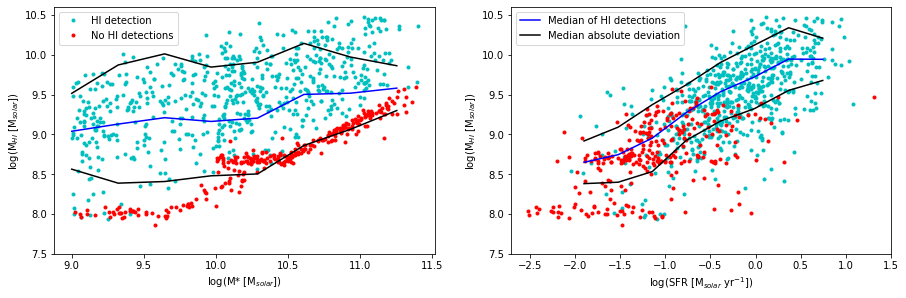

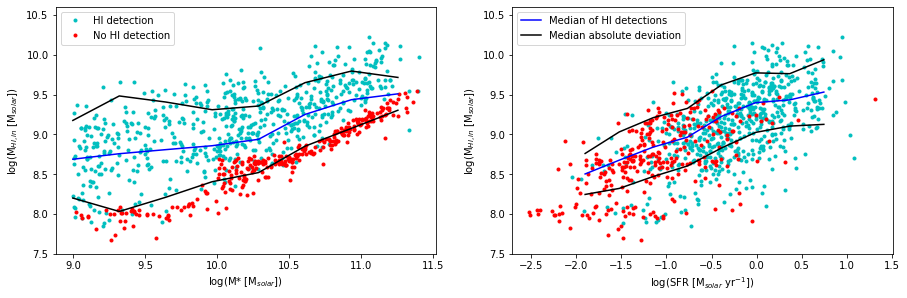

In [38]:
plt.figure(figsize = (15,10))

plt.subplot(221)
plt.plot(lgMstar1, lgMHI1, 'c.', label= 'HI detection')
plt.plot(lgMstar2, lgMHI2, 'r.', label= 'No HI detections')
plt.plot(bins[:-2], mHIa[:-2], 'b-')
plt.plot(bins[:-2], pMAD1[:-2], 'k-')
plt.plot(bins[:-2], nMAD1[:-2], 'k-')
plt.xlabel('log(M* [M$_{solar}$])')
plt.ylabel('log(M$_{HI}$ [M$_{solar}$])')
plt.legend(loc='upper left')
plt.ylim(7.5, 10.6);

plt.subplot(222)
plt.plot(np.log10(SFR_best1), lgMHI1, 'c.')
plt.plot(np.log10(SFR_best2), lgMHI2, 'r.')
plt.plot(bins2[:-2], mHIb[:-2], 'b-', label = 'Median of HI detections')
plt.plot(bins2[:-2], pMAD2[:-2], 'k-', label = 'Median absolute deviation')
plt.plot(bins2[:-2], nMAD2[:-2], 'k-')
plt.xlabel('log(SFR [M$_{solar}$ yr$^{-1}$])')
plt.ylabel('log(M$_{HI}$ [M$_{solar}$])')
plt.legend(loc='upper left')
plt.ylim(7.5, 10.6);

# Plotting the HI mass within the optical radius (effective radius of the disk), against stellar masses and SFR
plt.figure(figsize = (15,10))
plt.subplot(221)
plt.plot(lgMstar1, lgMHIpredin12eff, 'c.', label= 'HI detection')
plt.plot(lgMstar2, lgMHIpredin22eff, 'r.', label= 'No HI detection')
plt.xlabel('log(M* [M$_{solar}$])')
plt.ylabel('log(M$_{HI, in}$ [M$_{solar}$])')
plt.plot(INbins[:-2], INmHI1[:-2], 'b-')
plt.plot(INbins[:-2], INpMAD1[:-2], 'k-')
plt.plot(INbins[:-2], INnMAD1[:-2], 'k-')
plt.legend(loc='upper left')
plt.ylim(7.5, 10.6);

plt.subplot(222)
plt.plot(np.log10(SFR_best1), lgMHIpredin12eff, 'c.')
plt.plot(np.log10(SFR_best2), lgMHIpredin22eff, 'r.')
plt.xlabel('log(SFR [M$_{solar}$ yr$^{-1}$])')
plt.ylabel('log(M$_{HI, in}$ [M$_{solar}$])')
plt.plot(INbins2[:-2], INmHI2[:-2], 'b-', label = 'Median of HI detections')
plt.plot(INbins2[:-2], INpMAD2[:-2], 'k-', label = 'Median absolute deviation')
plt.plot(INbins2[:-2], INnMAD2[:-2], 'k-')
plt.legend(loc='upper left')
plt.ylim(7.5, 10.6);

In [39]:
print(effRkpc[0:11])
print(Rkpc[0:11])
effRtor90 = np.where(effRkpc > Rkpc)[0]
print(len(effRtor90))

[10.95919231  9.98150456  9.56815279  7.99022237  5.50663407  9.14754661
  6.74453861  7.25028028  6.69830867  7.44979649  4.91885191]
[7.5552745 7.0760946 5.8124747 5.9020486 4.1215577 5.874771  6.2682405
 5.2238584 5.629328  8.635725  3.8034928]
802


11) Looking in more detail at the optical regions and comparisons between the two

In [40]:
R90kpc = Rkpc
Reffkpc = effRkpc
# Looking at the model flags from the decomposition dataset of Cook et al 2019
# Applying these model flags to the r90 and 2Reff radii
r90_0 = R90kpc[np.where(MFlag > 0)]
r90_1 = R90kpc[np.where((MFlag > 1) & (MFlag < 3))[0]]
r90_2 = R90kpc[np.where((MFlag > 2) & (MFlag < 4))[0]]
r90_3 = R90kpc[np.where((MFlag > 3) & (MFlag < 5))[0]]
r90_4 = R90kpc[np.where(MFlag > 5)[0]]
rEff_0 = Reffkpc[np.where(MFlag > 0)]
rEff_1 = Reffkpc[np.where((MFlag > 1) & (MFlag < 3))[0]]
rEff_2 = Reffkpc[np.where((MFlag > 2) & (MFlag < 4))[0]]
rEff_3 = Reffkpc[np.where((MFlag > 3) & (MFlag < 5))[0]]
rEff_4 = Reffkpc[np.where(MFlag > 5)[0]]

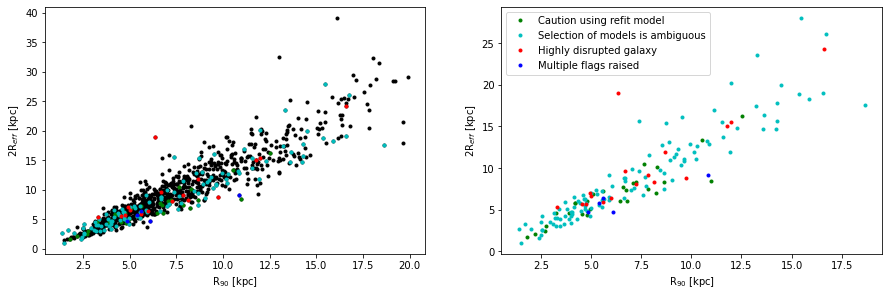

In [41]:
# To determine how closely the two radii relate to each other, we plot them against each other
plt.figure(figsize = (15,10))
plt.subplot(221)
plt.plot(R90kpc, Reffkpc, 'k.')
plt.plot(r90_1, rEff_1, 'g.')
plt.plot(r90_2, rEff_2, 'c.')
plt.plot(r90_3, rEff_3, 'r.')
plt.plot(r90_4, rEff_4, 'b.')
plt.ylabel('2R$_{eff}$ [kpc]')
plt.xlabel('R$_{90}$ [kpc]')

plt.subplot(222)
plt.plot(r90_1, rEff_1, 'g.', label='Caution using refit model')
plt.plot(r90_2, rEff_2, 'c.', label='Selection of models is ambiguous')
plt.plot(r90_3, rEff_3, 'r.', label='Highly disrupted galaxy')
plt.plot(r90_4, rEff_4, 'b.', label='Multiple flags raised')
plt.ylabel('2R$_{eff}$ [kpc]')
plt.xlabel('R$_{90}$ [kpc]')
plt.legend(loc='best');

In [42]:
# From above the populations to be removed are those with ambiguity, highly disrupted galaxies and those with multiple flags raised
R90kpc = np.delete(R90kpc, (np.where(MFlag > 3)))
Reffkpc = np.delete(Reffkpc, (np.where(MFlag > 3)))
# Calculating the ratio between the radii of the two definitions of the optical regions
Rratio = R90kpc / Reffkpc
lgRratio = np.log10(Rratio)

Gradient: 1.0204494505065798 +/- 0.006055719950026181


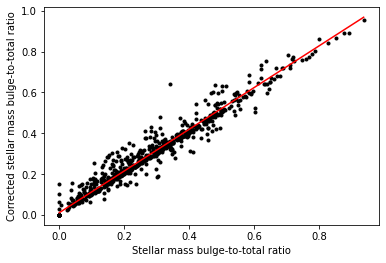

In [43]:
# Comparing the Bulge-to-Total and Bulge-to-Total (corrected) data
BtoMCorrd = np.delete(BtoMCorr, (np.where(MFlag > 3)))
BtoMrd = np.delete(BtoM, (np.where(MFlag > 3)))
plt.plot(BtoMCorrd, BtoMrd, 'k.')
plt.ylabel('Corrected stellar mass bulge-to-total ratio')
plt.xlabel('Stellar mass bulge-to-total ratio')
x = BtoMCorrd
p = np.linspace(min(x), max(x), 1000)
y = BtoMrd
def linfun(x, m, c): 
    return m*x + c
p0 = np.array([])
popt, pcov = curve_fit(linfun, x, y)
plt.plot(p, linfun(p, *popt), 'r-')
print('Gradient:', popt[0], '+/-', np.sqrt(pcov.diagonal()[0]));

In [44]:
# Cutting the relevant stellar mass properties
lgMstar_cut = np.delete(lgMstar, (np.where(MFlag > 3)))
NUVr_cut = np.delete(NUVr, (np.where(MFlag > 3)))
SFR_best_cut = np.delete(SFR_best, (np.where(MFlag > 3)))
lgmust_cut = np.delete(lgmust, (np.where(MFlag > 3)))
# sSFR is calculated as the star formation rate / Mstar
sSFR = SFR_best_cut / (10**lgMstar_cut)
lgsSFR = np.log10(sSFR)
print('B/T > 0.6:', len(np.where(BtoMCorrd > 0.6)[0]))
print('B/T > 0.4:', len(np.where(BtoMCorrd > 0.4)[0]))
print('B/T > 0.2:', len(np.where(BtoMCorrd > 0.2)[0]))
print('B/T > 0.1:', len(np.where(BtoMCorrd > 0.1)[0]))
print('Galaxies where r90 is greater than double the effective disk radius:', len(np.where(R90kpc > Reffkpc)[0]))

B/T > 0.6: 38
B/T > 0.4: 159
B/T > 0.2: 428
B/T > 0.1: 553
Galaxies where r90 is greater than double the effective disk radius: 106


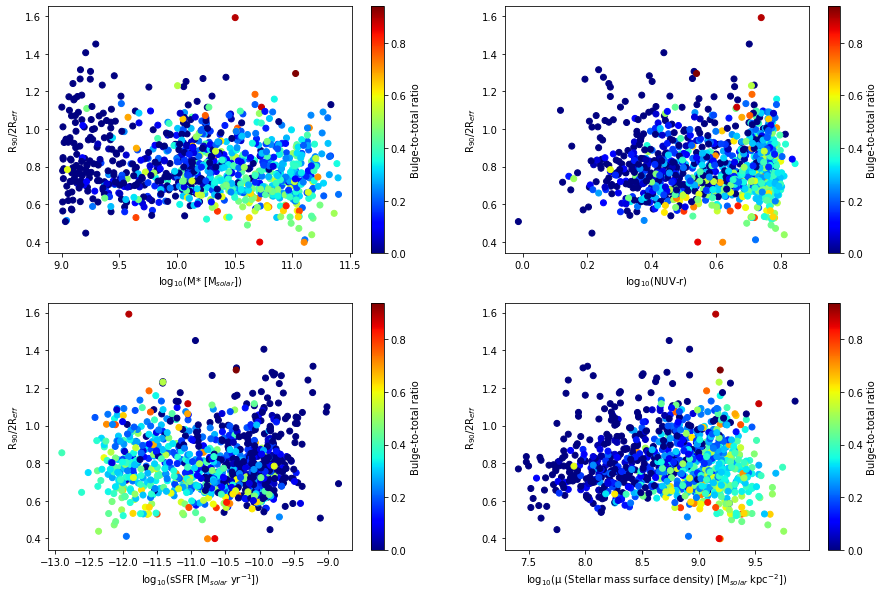

In [45]:
# We can make a few plots that look at how well the radii ration corresponds to various galactic features from the sample
plt.figure(figsize = (15,10))

# Plotting R90/2Reff against Stellar Mass
plt.subplot(221)
plt.scatter(lgMstar_cut, Rratio, c = BtoMCorrd, cmap ='jet')
plt.colorbar(label='Bulge-to-total ratio', orientation='vertical')
plt.ylabel('R$_{90}$/2R$_{eff}$')
plt.xlabel('log$_{10}$(M* [M$_{solar}$])')

# Plotting R90/2Reff against NUV-r colour index
plt.subplot(222)
plt.scatter(np.log10(NUVr_cut), Rratio, c = BtoMCorrd, cmap='jet')
plt.colorbar(label='Bulge-to-total ratio', orientation='vertical')
plt.ylabel('R$_{90}$/2R$_{eff}$')
plt.xlabel('log$_{10}$(NUV-r)')

# Plotting R90/2Reff against sSFR, specific Star Formation Rate
plt.subplot(223)
plt.scatter(lgsSFR, Rratio, c = BtoMCorrd, cmap='jet')
plt.colorbar(label='Bulge-to-total ratio', orientation='vertical')
plt.ylabel('R$_{90}$/2R$_{eff}$')
plt.xlabel('log$_{10}$(sSFR [M$_{solar}$ yr$^{-1}$])')

# Plotting R90/2Reff against stellar mass surface density
plt.subplot(224)
plt.scatter(lgmust_cut, Rratio, c = BtoMCorrd, cmap='jet')
plt.colorbar(label='Bulge-to-total ratio', orientation='vertical')
plt.ylabel('R$_{90}$/2R$_{eff}$')
plt.xlabel('log$_{10}$(μ (Stellar mass surface density) [M$_{solar}$ kpc$^{-2}$])');

In [46]:
# Due to the large number of galaxies dominated by a disk component need to change the bins to focus more of those galaxies
# Over half the galaxies present in the sample are between 0 and 0.2 on the bulge-to-total ratio
BtoMCorrd_0 = BtoMCorrd[np.where(BtoMCorrd < 0.2)]
BtoMCorrd_02 = BtoMCorrd[np.where((BtoMCorrd > 0.2) & (BtoMCorrd < 0.4))]
BtoMCorrd_03 = BtoMCorrd[np.where(BtoMCorrd > 0.4)]

Rratio_0 = Rratio[np.where(BtoMCorrd < 0.2)]
Rratio_02 = Rratio[np.where((BtoMCorrd > 0.2) & (BtoMCorrd < 0.4))]
Rratio_03 = Rratio[np.where(BtoMCorrd > 0.4)]

lgMstar_0 = lgMstar[np.where(BtoMCorrd < 0.2)]
lgMstar_02 = lgMstar[np.where((BtoMCorrd > 0.2) & (BtoMCorrd < 0.4))]
lgMstar_03 = lgMstar[np.where(BtoMCorrd > 0.4)]

NUVr_0 = NUVr[np.where(BtoMCorrd < 0.2)]
NUVr_02 = NUVr[np.where((BtoMCorrd > 0.2) & (BtoMCorrd < 0.4))]
NUVr_03 = NUVr[np.where(BtoMCorrd > 0.4)]

lgsSFR_0 = lgsSFR[np.where(BtoMCorrd < 0.2)]
lgsSFR_02 = lgsSFR[np.where((BtoMCorrd > 0.2) & (BtoMCorrd < 0.4))]
lgsSFR_03 = lgsSFR[np.where(BtoMCorrd > 0.4)]

lgmust_0 = lgmust[np.where(BtoMCorrd < 0.2)]
lgmust_02 = lgmust[np.where((BtoMCorrd > 0.2) & (BtoMCorrd < 0.4))]
lgmust_03 = lgmust[np.where(BtoMCorrd > 0.4)]

In [47]:
# Finding the running median of the galaxies 
# Arrays for the bins
bins_Mstar = np.linspace(9, 11.5, 10)
bins_NUVr = np.linspace(0, 0.9, 10)
bins_sSFR = np.linspace(-13, -9, 10)
bins_Must = np.linspace(7.5, 10, 10)

# Array of zeroes to store the median of each bin
mHI_Mstar = np.zeros(len(bins_Mstar))
median_Mstar = np.zeros(len(bins_Mstar))
MAD_Mstar = np.zeros(len(bins_Mstar))

mHI_NUVr = np.zeros(len(bins_NUVr))
median_NUVr = np.zeros(len(bins_NUVr))
MAD_NUVr = np.zeros(len(bins_NUVr))

mHI_sSFR = np.zeros(len(bins_sSFR))
median_sSFR = np.zeros(len(bins_sSFR))
MAD_sSFR = np.zeros(len(bins_sSFR))

mHI_Must = np.zeros(len(bins_Must))
median_Must = np.zeros(len(bins_Must))
MAD_Must = np.zeros(len(bins_Must))

# Using a for loop to iterate over the median values for each of the bins
for i in range(len(bins_Mstar) -1):
  # Median and MAD for the Mstar graph
  median_Mstar[i] = np.median(Rratio_0[np.where((lgMstar_0 >= bins_Mstar[i]) & (lgMstar_0 <= bins_Mstar[i+1]))])
  MAD_Mstar[i] = stats.median_absolute_deviation(Rratio_0[np.where((lgMstar_0 >= bins_Mstar[i]) & (lgMstar_0 <= bins_Mstar[i+1]))])
  mHI_Mstar[i] = median_Mstar[i]

for i in range (len(bins_NUVr) -1):
  # Median and MAD for the NUV-r graph
  median_NUVr[i] = np.median(Rratio_0[np.where((np.log10(NUVr_0) >= bins_NUVr[i]) & (np.log10(NUVr_0) <= bins_NUVr[i+1]))])
  MAD_NUVr[i] = stats.median_absolute_deviation(Rratio_0[np.where((np.log10(NUVr_0) >= bins_NUVr[i]) & (np.log10(NUVr_0) <= bins_NUVr[i+1]))])
  mHI_NUVr[i] = median_NUVr[i]

for i in range (len(bins_sSFR) -1):
  # Median and MAD for the sSFR graph
  median_sSFR[i] = np.median(Rratio_0[np.where((lgsSFR_0 >= bins_sSFR[i]) & (lgsSFR_0 <= bins_sSFR[i+1]))])
  MAD_sSFR[i] = stats.median_absolute_deviation(Rratio_0[np.where((lgsSFR_0 >= bins_sSFR[i]) & (lgsSFR_0 <= bins_sSFR[i+1]))])
  mHI_sSFR[i] = median_sSFR[i]

for i in range (len(bins_Must) -1):
  #Median and MAD for the Must graph
  median_Must[i] = np.median(Rratio_0[np.where((lgmust_0 >= bins_Must[i]) & (lgmust_0 <= bins_Must[i+1]))])
  MAD_Must[i] = stats.median_absolute_deviation(Rratio_0[np.where((lgmust_0 >= bins_Must[i]) & (lgmust_0 <= bins_Must[i+1]))])
  mHI_Must[i] = median_Must[i]

# Working out the upper and lower bounds of the median absolute deviation
# Mstar graph median bounds
pMAD_Mstar = mHI_Mstar + MAD_Mstar
nMAD_Mstar = mHI_Mstar - MAD_Mstar
# NUV-r graph median bounds
pMAD_NUVr = mHI_NUVr + MAD_NUVr
nMAD_NUVr = mHI_NUVr - MAD_NUVr
# sSFR graph median bounds
pMAD_sSFR = mHI_sSFR + MAD_sSFR
nMAD_sSFR = mHI_sSFR - MAD_sSFR
# Must graph median bounds
pMAD_Must = mHI_Must + MAD_Must
nMAD_Must = mHI_Must - MAD_Must


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


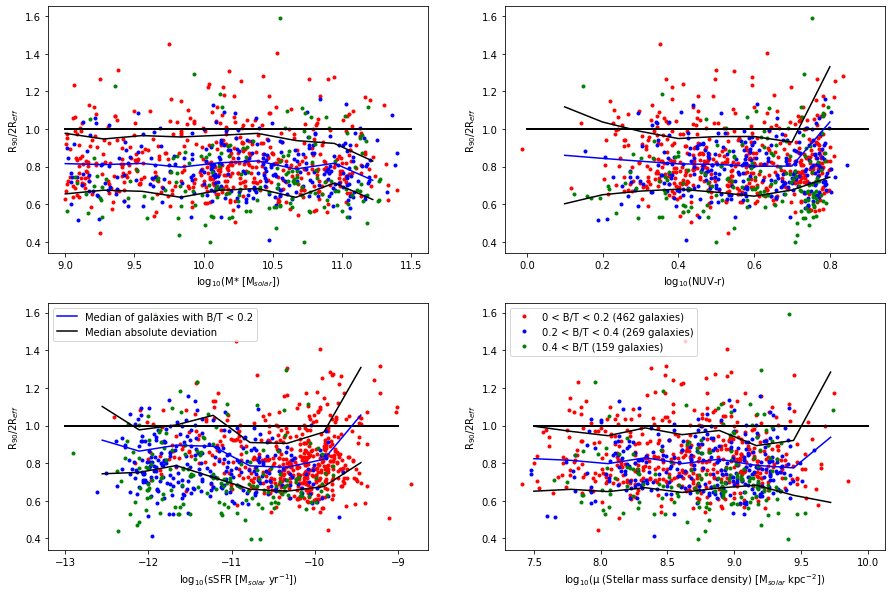

In [48]:
plt.figure(figsize = (15,10))
zliney = np.ones(10)

# Plotting R90/2Reff against Stellar Mass
plt.subplot(221)
plt.plot(lgMstar_0, Rratio_0, 'r.')
plt.plot(lgMstar_02, Rratio_02, 'b.')
plt.plot(lgMstar_03, Rratio_03, 'g.')
plt.ylabel('R$_{90}$/2R$_{eff}$')
plt.xlabel('log$_{10}$(M* [M$_{solar}$])')
# Adding a line where R90 = 2Reff, above here R90 > 2Reff, below 2Reff > R90
zlinex = np.linspace(9, 11.5, 10)
plt.plot(zlinex, zliney, 'k-', linewidth = 2)
# Adding a median line for 0 < B/T < 0.2
plt.plot(bins_Mstar[:-1], mHI_Mstar[:-1], 'b-')
plt.plot(bins_Mstar[:-1], pMAD_Mstar[:-1], 'k-')
plt.plot(bins_Mstar[:-1], nMAD_Mstar[:-1], 'k-')
# Adding a median line for all data


# Plotting R90/2Reff against NUV-r colour index
plt.subplot(222)
plt.plot(np.log10(NUVr_0), Rratio_0, 'r.')
plt.plot(np.log10(NUVr_02), Rratio_02, 'b.')
plt.plot(np.log10(NUVr_03), Rratio_03, 'g.')
plt.ylabel('R$_{90}$/2R$_{eff}$')
plt.xlabel('log$_{10}$(NUV-r)')
zlinex = np.linspace(0, 0.9, 10)
plt.plot(zlinex, zliney, 'k-', linewidth = 2)
# Adding a median line for 0 < B/T < 0.2
plt.plot(bins_NUVr[:-1], mHI_NUVr[:-1], 'b-')
plt.plot(bins_NUVr[:-1], pMAD_NUVr[:-1], 'k-')
plt.plot(bins_NUVr[:-1], nMAD_NUVr[:-1], 'k-')

# Plotting R90/2Reff against sSFR, specific Star Formation Rate
plt.subplot(223)
plt.plot(lgsSFR_0, Rratio_0, 'r.')
plt.plot(lgsSFR_02, Rratio_02, 'b.')
plt.plot(lgsSFR_03, Rratio_03, 'g.')
plt.ylabel('R$_{90}$/2R$_{eff}$')
plt.xlabel('log$_{10}$(sSFR [M$_{solar}$ yr$^{-1}$])')
zlinex = np.linspace(-13, -9, 10)
plt.plot(zlinex, zliney, 'k-', linewidth = 2)
plt.plot(bins_sSFR[:-1], mHI_sSFR[:-1], 'b-', label='Median of galaxies with B/T < 0.2')
plt.plot(bins_sSFR[:-1], pMAD_sSFR[:-1], 'k-', label='Median absolute deviation')
plt.plot(bins_sSFR[:-1], nMAD_sSFR[:-1], 'k-')
plt.legend(loc='upper left')

# Plotting R90/2Reff against stellar mass surface density
plt.subplot(224)
plt.plot(lgmust_0, Rratio_0, 'r.', label='0 < B/T < 0.2 (462 galaxies)')
plt.plot(lgmust_02, Rratio_02, 'b.', label='0.2 < B/T < 0.4 (269 galaxies)')
plt.plot(lgmust_03, Rratio_03, 'g.', label='0.4 < B/T (159 galaxies)')
plt.ylabel('R$_{90}$/2R$_{eff}$')
plt.xlabel('log$_{10}$(μ (Stellar mass surface density) [M$_{solar}$ kpc$^{-2}$])')
zlinex = np.linspace(7.5, 10, 10)
plt.plot(zlinex, zliney, 'k-', linewidth = 2)
# Adding a median line for 0 < B/T < 0.2
plt.plot(bins_Must[:-1], mHI_Must[:-1], 'b-')
plt.plot(bins_Must[:-1], pMAD_Must[:-1], 'k-')
plt.plot(bins_Must[:-1], nMAD_Must[:-1], 'k-')
plt.legend(loc='upper left');

In [49]:
# Finding a median line for all the data present (global)
# Array of zeroes to store the median of each bin
mHI_Mstar_gl = np.zeros(len(bins_Mstar))
median_Mstar_gl = np.zeros(len(bins_Mstar))

mHI_NUVr_gl = np.zeros(len(bins_NUVr))
median_NUVr_gl = np.zeros(len(bins_NUVr))

mHI_sSFR_gl = np.zeros(len(bins_sSFR))
median_sSFR_gl = np.zeros(len(bins_sSFR))

mHI_Must_gl = np.zeros(len(bins_Must))
median_Must_gl = np.zeros(len(bins_Must))

# Using a for loop to iterate over the median values for each of the bins
for i in range(len(bins_Mstar) -1):
  # Median and MAD for the Mstar graph
  median_Mstar_gl[i] = np.median(Rratio[np.where((lgMstar_cut >= bins_Mstar[i]) & (lgMstar_cut <= bins_Mstar[i+1]))])
  mHI_Mstar_gl[i] = median_Mstar_gl[i]

for i in range (len(bins_NUVr) -1):
  # Median and MAD for the NUV-r graph
  median_NUVr_gl[i] = np.median(Rratio[np.where((np.log10(NUVr_cut) >= bins_NUVr[i]) & (np.log10(NUVr_cut) <= bins_NUVr[i+1]))])
  mHI_NUVr_gl[i] = median_NUVr_gl[i]

for i in range (len(bins_sSFR) -1):
  # Median and MAD for the sSFR graph
  median_sSFR_gl[i] = np.median(Rratio[np.where((lgsSFR >= bins_sSFR[i]) & (lgsSFR <= bins_sSFR[i+1]))])
  mHI_sSFR_gl[i] = median_sSFR_gl[i]

for i in range (len(bins_Must) -1):
  #Median and MAD for the Must graph
  median_Must_gl[i] = np.median(Rratio[np.where((lgmust_cut >= bins_Must[i]) & (lgmust_cut <= bins_Must[i+1]))])
  mHI_Must_gl[i] = median_Must_gl[i]

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


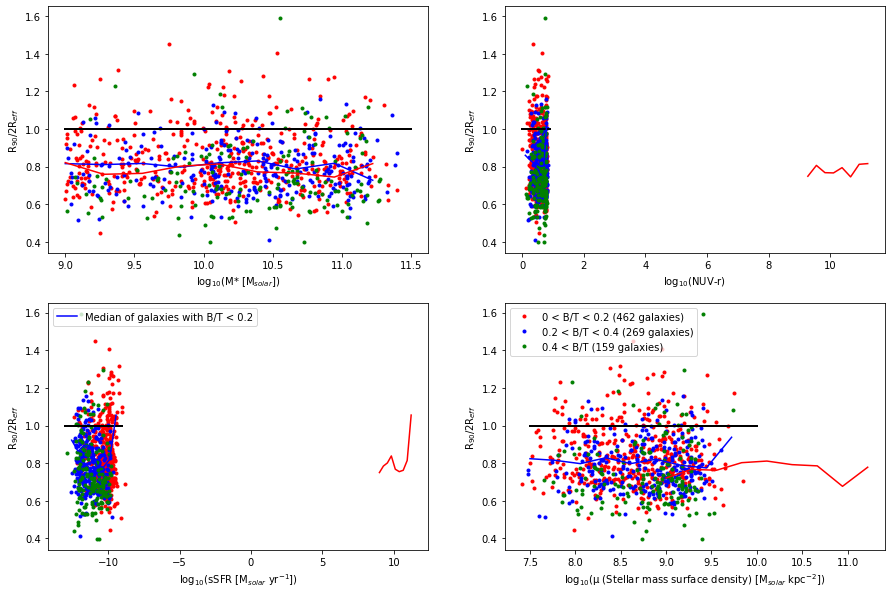

In [50]:
plt.figure(figsize = (15,10))
zliney = np.ones(10)

# Plotting R90/2Reff against Stellar Mass
plt.subplot(221)
plt.plot(lgMstar_0, Rratio_0, 'r.')
plt.plot(lgMstar_02, Rratio_02, 'b.')
plt.plot(lgMstar_03, Rratio_03, 'g.')
plt.ylabel('R$_{90}$/2R$_{eff}$')
plt.xlabel('log$_{10}$(M* [M$_{solar}$])')
# Adding a line where R90 = 2Reff, above here R90 > 2Reff, below 2Reff > R90
zlinex = np.linspace(9, 11.5, 10)
plt.plot(zlinex, zliney, 'k-', linewidth = 2)
# Adding a median line for 0 < B/T < 0.2
plt.plot(bins_Mstar[:-1], mHI_Mstar[:-1], 'b-')
# Adding a median line for all data
plt.plot(bins_Mstar[:-1], mHI_Mstar_gl[:-1], 'r-')

# Plotting R90/2Reff against NUV-r colour index
plt.subplot(222)
plt.plot(np.log10(NUVr_0), Rratio_0, 'r.')
plt.plot(np.log10(NUVr_02), Rratio_02, 'b.')
plt.plot(np.log10(NUVr_03), Rratio_03, 'g.')
plt.ylabel('R$_{90}$/2R$_{eff}$')
plt.xlabel('log$_{10}$(NUV-r)')
zlinex = np.linspace(0, 0.9, 10)
plt.plot(zlinex, zliney, 'k-', linewidth = 2)
# Adding a median line for 0 < B/T < 0.2
plt.plot(bins_NUVr[:-1], mHI_NUVr[:-1], 'b-')
# Adding a median line for all data
plt.plot(bins_Mstar[:-1], mHI_NUVr_gl[:-1], 'r-')

# Plotting R90/2Reff against sSFR, specific Star Formation Rate
plt.subplot(223)
plt.plot(lgsSFR_0, Rratio_0, 'r.')
plt.plot(lgsSFR_02, Rratio_02, 'b.')
plt.plot(lgsSFR_03, Rratio_03, 'g.')
plt.ylabel('R$_{90}$/2R$_{eff}$')
plt.xlabel('log$_{10}$(sSFR [M$_{solar}$ yr$^{-1}$])')
zlinex = np.linspace(-13, -9, 10)
plt.plot(zlinex, zliney, 'k-', linewidth = 2)
# Adding a median line for 0 < B/T < 0.2
plt.plot(bins_sSFR[:-1], mHI_sSFR[:-1], 'b-', label='Median of galaxies with B/T < 0.2')
# Adding a median line for all data
plt.plot(bins_Mstar[:-1], mHI_sSFR_gl[:-1], 'r-')
plt.legend(loc='upper left')

# Plotting R90/2Reff against stellar mass surface density
plt.subplot(224)
plt.plot(lgmust_0, Rratio_0, 'r.', label='0 < B/T < 0.2 (462 galaxies)')
plt.plot(lgmust_02, Rratio_02, 'b.', label='0.2 < B/T < 0.4 (269 galaxies)')
plt.plot(lgmust_03, Rratio_03, 'g.', label='0.4 < B/T (159 galaxies)')
plt.ylabel('R$_{90}$/2R$_{eff}$')
plt.xlabel('log$_{10}$(μ (Stellar mass surface density) [M$_{solar}$ kpc$^{-2}$])')
zlinex = np.linspace(7.5, 10, 10)
plt.plot(zlinex, zliney, 'k-', linewidth = 2)
# Adding a median line for 0 < B/T < 0.2
plt.plot(bins_Must[:-1], mHI_Must[:-1], 'b-')
# Adding a median line for all data
plt.plot(bins_Mstar[:-1], mHI_Must_gl[:-1], 'r-')
plt.legend(loc='upper left');